In [3]:
"""
Coalescing Random Walks
Bram Silbert
7/10/22
"""

import random
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
from statistics import variance
from scipy.optimize import curve_fit
import math

def func1(x, a, b, c):
    return a*(x**2) + b*x + c

def func2(x, a, b, c, d):
    return a*(x**3) + b*(x**2) + c*x + d

def func3(x, a, b, c, d, e):
    return a*(x**4) + b*(x**3) + c*(x**2) + d*x + e

ModuleNotFoundError: No module named 'matplotlib'

In [1]:
def coalescence(N, s): #sim of random walk on N-cycle
    times = [] #list of times to coalescence
    for i in range(s): #runs s simulations
        particles = list(range(N))
        count = N #record of how many particles are left
        t = 0
        while count > 1: #runs until coalescence
            part = random.randint(0,len(particles)-1)#random particle is sampled
            particles[part] = (particles[part]+1)%N #particle moved to next position mod N
            if particles.count(particles[part])>1: #if more than one particle in position
                particles.remove(particles[part]) #one of the two particles is removed
                count -= 1
            t += 1
        times.append(t)
    return times

times=coalescence(10, 100000)
plt.hist(times, density=True, bins=list(range(1, max(times)+1)))
plt.xlabel("Time to Coalescence")
plt.ylabel("Frequency")
plt.show()
values, base = np.histogram(times, bins=list(range(1, max(times)+1)))
cumulative = np.cumsum(values)
plt.plot(base[:-1], (len(times)-cumulative)/100000, c='blue')
plt.xlabel("t")
plt.ylabel("P(T > t)")
plt.show()
plt.plot(base[:-1], (len(times)-cumulative)/100000, c='blue')
x = np.linspace(1, 250, 1000)
y = (np.cos((np.pi)/10))**x
plt.plot(x, y)
plt.yscale("log")
plt.xlabel("t")
plt.ylabel("log(P(T > t))")
plt.show()

#slope should be log(cos(pi/n))

NameError: name 'random' is not defined

Best fit function: f(x) = 0.5008548893203797x^2 + -0.5197909491690538x + 0.07300402758416902


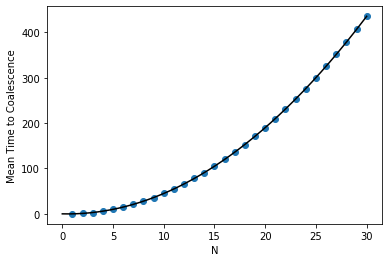

Best fit function: f(x) = 0.3043244026113965x^4 + -0.6800200220348269x^3 + 2.3047812637688656x^2 + -10.066596400712298x + 11.205398699838488


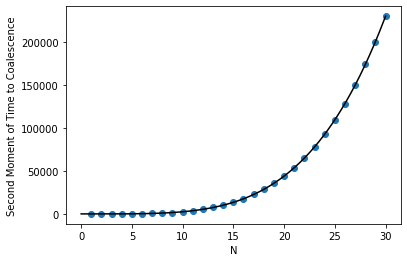

Best fit function: f(x) = 3.1245072379663985x^3 + -63.542193213189705x^2 + 454.1787379885416x + -807.3601811185146


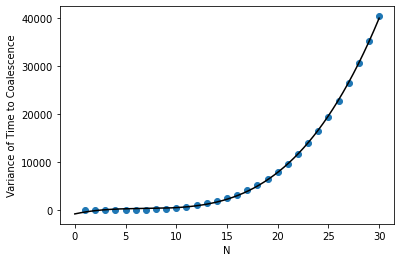

In [108]:
def coal_func(k): #plots mean time to coalescence as a function of N
    n_vals = list(range(1, k+1))
    t_aves = []
    t_vars = []
    t_sec = []
    for n in range(1, k+1):
        c = coalescence(n, 250000)
        ave = mean(c)
        sec_list = []
        for i in c:
            sec_list.append(i**2)
        sec = mean(sec_list)
        var = variance(c)
        t_aves.append(ave)
        t_vars.append(var)
        t_sec.append(sec)
    return n_vals, t_aves, t_sec, t_vars

k = 30
n, m, s, v = coal_func(k)
params, cov = curve_fit(func1, n, m)
x = np.linspace(0, k, 1000)
y = params[0]*(x**2) + params[1]*x + params[2]
print("Best fit function:", "f(x) = "+str(params[0])+"x^2 + "+str(params[1])+"x + "+str(params[2]))
plt.scatter(n, m)
plt.plot(x, y, color="black")
plt.xlabel("N")
plt.ylabel("Mean Time to Coalescence")
plt.show()
params, cov = curve_fit(func3, n, s)
x = np.linspace(0, k, 1000)
y = params[0]*(x**4) + params[1]*(x**3) + params[2]*(x**2) + params[3]*x + params[4]
print("Best fit function:", "f(x) = "+str(params[0])+"x^4 + "+str(params[1])+"x^3 + "+str(params[2])+"x^2 + "+str(params[3])+"x + "+str(params[4]))
plt.scatter(n, s)
plt.plot(x, y, color="black")
plt.xlabel("N")
plt.ylabel("Second Moment of Time to Coalescence")
plt.show()
params, cov = curve_fit(func2, n, v)
x = np.linspace(0, k, 1000)
y = params[0]*(x**3) + params[1]*(x**2) + params[2]*x + params[3]
print("Best fit function:", "f(x) = "+str(params[0])+"x^3 + "+str(params[1])+"x^2 + "+str(params[2])+"x + "+str(params[3]))
plt.scatter(n, v)
plt.xlabel("N")
plt.ylabel("Variance of Time to Coalescence")
plt.plot(x, y, c="black")
plt.show()

#best fit function is (1/2)(n^2 - n)

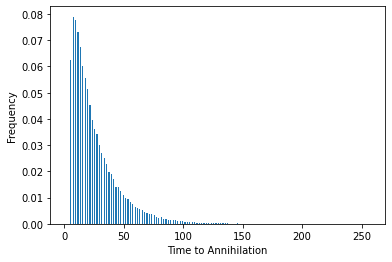

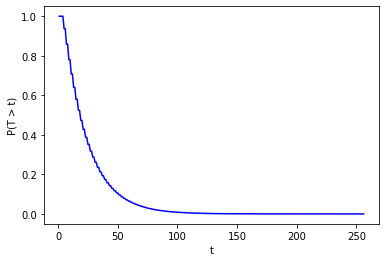

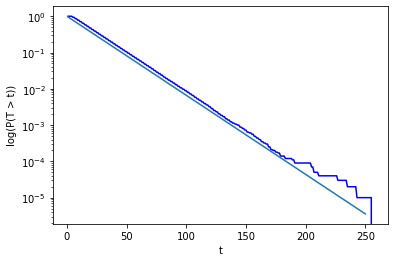

In [4]:
def annihilation(N, s):
    times = []
    for i in range(s):
        particles = list(range(N))
        count = N
        t = 0
        while count > 1:
            part = random.randint(0,len(particles)-1)
            particles[part] = (particles[part]+1)%N
            if particles.count(particles[part])>1:
                name = particles[part]
                particles.remove(name) #same as before except both particles are removed
                particles.remove(name)
                count -= 2
            t += 1
        times.append(t)
    return times

times=annihilation(10, 100000)
plt.hist(times, density=True, bins=list(range(1, max(times)+1)))
plt.xlabel("Time to Annihilation")
plt.ylabel("Frequency")
plt.show()
values, base = np.histogram(times, bins=list(range(1, max(times)+1)))
cumulative = np.cumsum(values)
plt.plot(base[:-1], (len(times)-cumulative)/100000, c='blue')
plt.xlabel("t")
plt.ylabel("P(T > t)")
plt.show()
plt.plot(base[:-1], (len(times)-cumulative)/100000, c='blue')
x = np.linspace(1, 250, 1000)
y = (np.cos((np.pi)/10))**x
plt.plot(x, y)
plt.yscale("log")
plt.xlabel("t")
plt.ylabel("log(P(T > t))")
plt.show()

Best fit function 1: f(x) = 0.25011742424078853x^2 + -0.003948787880976745x + 0.03633333333121769
Best fit function 2: f(x) = 0.11165956439200253x^2 + -0.012718560608284024x + 6.354166455768695e-05


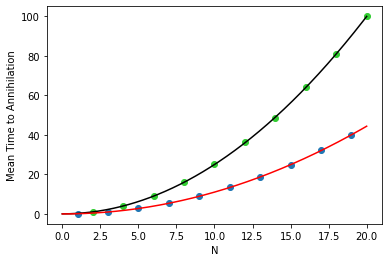

Best fit function 1: f(x) = 1.8101078722730692x^3 + -26.976077869473954x^2 + 150.7403377509755x + -242.2246074839493
Best fit function 2: f(x) = 0.24117164662469415x^3 + -3.2019391548301845x^2 + 14.177967709343523x + -15.133669596753958


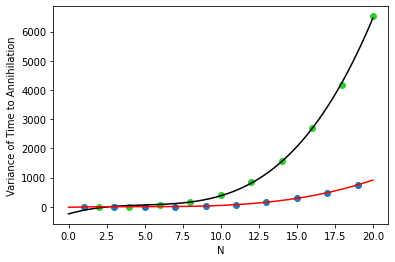

In [5]:
def ann_func(): #plots mean time to annihilation as a function of N
    n_evens = list(range(2, 21, 2))
    n_odds = list(range(1, 21, 2))
    t_aves_even = []
    t_vars_even = []
    t_aves_odd = []
    t_vars_odd = []
    for n in range(1, 21):
        c = annihilation(n, 10000)
        ave = mean(c)
        var = variance(c)
        if n%2==0:
            t_aves_even.append(ave)
            t_vars_even.append(var)
        else:
            t_aves_odd.append(ave)
            t_vars_odd.append(var)
    params1, cov1 = curve_fit(func1, n_evens, t_aves_even)
    params2, cov2 = curve_fit(func1, n_odds, t_aves_odd)
    x = np.linspace(0, 20, 1000)
    y1 = params1[0]*(x**2) + params1[1]*x + params1[2]
    y2 = params2[0]*(x**2) + params2[1]*x + params2[2]
    print("Best fit function 1:", "f(x) = "+str(params1[0])+"x^2 + "+str(params1[1])+"x + "+str(params1[2]))
    print("Best fit function 2:", "f(x) = "+str(params2[0])+"x^2 + "+str(params2[1])+"x + "+str(params2[2]))
    plt.scatter(n_evens, t_aves_even, c="limegreen")
    plt.scatter(n_odds, t_aves_odd)
    plt.plot(x, y1, color="black")
    plt.plot(x, y2, color="red")
    plt.xlabel("N")
    plt.ylabel("Mean Time to Annihilation")
    plt.show()
    params1, cov1 = curve_fit(func2, n_evens, t_vars_even)
    params2, cov2 = curve_fit(func2, n_odds, t_vars_odd)
    x = np.linspace(0, 20, 1000)
    y1 = params1[0]*(x**3) + params1[1]*(x**2) + params1[2]*x + params1[3]
    y2 = params2[0]*(x**3) + params2[1]*(x**2) + params2[2]*x + params2[3]
    print("Best fit function 1:", "f(x) = "+str(params1[0])+"x^3 + "+str(params1[1])+"x^2 + "+str(params1[2])+"x + "+str(params1[3]))
    print("Best fit function 2:", "f(x) = "+str(params2[0])+"x^3 + "+str(params2[1])+"x^2 + "+str(params2[2])+"x + "+str(params2[3]))
    plt.scatter(n_evens, t_vars_even, c="limegreen")
    plt.scatter(n_odds, t_vars_odd)
    plt.plot(x, y1, color="black")
    plt.plot(x, y2, color="red")
    plt.xlabel("N")
    plt.ylabel("Variance of Time to Annihilation")
    plt.show()

ann_func()

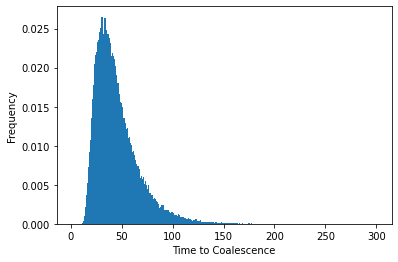

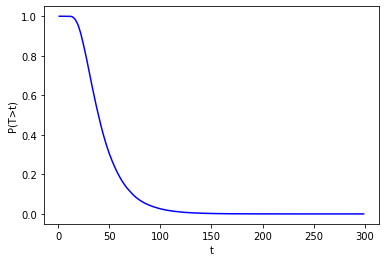

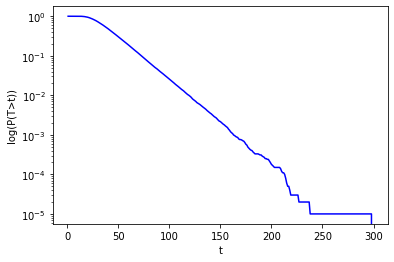

In [6]:
def ccw_coal(N, s, p):
    times = [] #list of times to coalescence
    for i in range(s): #runs s simulations
        particles = list(range(N))
        count = N #record of how many particles are left
        t = 0
        while count > 1: #runs until coalescence
            part = random.randint(0,len(particles)-1)#random particle is sampled
            chance = random.uniform(0, 1)
            if chance <= p:
                particles[part] = (particles[part]+1)%N #particle moved to next clockwise position mod N
            else:
                particles[part] = (particles[part]-1)%N #particle move to next ccw position mod N
            if particles.count(particles[part])>1: #if more than one particle in position
                particles.remove(particles[part]) #one of the two particles is removed
                count -= 1
            t += 1
        times.append(t)
    return times

times=ccw_coal(10, 100000, 0.5)
plt.hist(times, density=True, bins=list(range(1, max(times)+1)))
plt.xlabel("Time to Coalescence")
plt.ylabel("Frequency")
plt.show()
values, base = np.histogram(times, bins=list(range(1, max(times)+1)))
cumulative = np.cumsum(values)
plt.plot(base[:-1], (len(times)-cumulative)/100000, c='blue')
plt.xlabel("t")
plt.ylabel("P(T>t)")
plt.show()
plt.plot(base[:-1], (len(times)-cumulative)/100000, c='blue')
plt.yscale("log")
plt.xlabel("t")
plt.ylabel("log(P(T>t))")
plt.show()

Best fit function: f(x) = 0.4995277910674891x^2 + -0.4657194771050457x + -0.14361850877441196


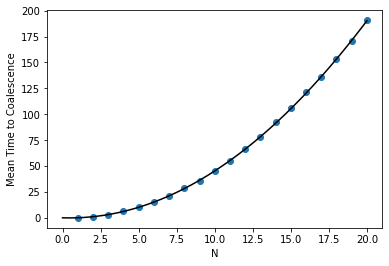

Best fit function: f(x) = 2.1761055891104935x^3 + -31.136121908133298x^2 + 157.68188888366834x + -208.35319140859224


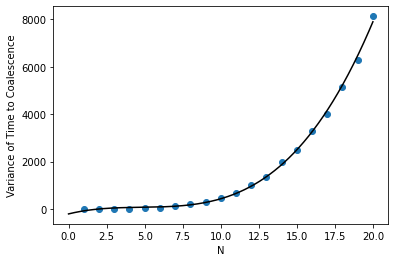

In [7]:
def ccw_coal_func(): #plots mean time to coalescence as a function of N
    n_vals = list(range(1, 21))
    t_aves = []
    t_vars = []
    for n in range(1, 21):
        c = ccw_coal(n, 10000, 0.5)
        ave = mean(c)
        var = variance(c)
        t_aves.append(ave)
        t_vars.append(var)
    params, cov = curve_fit(func1, n_vals, t_aves)
    x = np.linspace(0, 20, 1000)
    y = params[0]*(x**2) + params[1]*x + params[2]
    print("Best fit function:", "f(x) = "+str(params[0])+"x^2 + "+str(params[1])+"x + "+str(params[2]))
    plt.scatter(n_vals, t_aves)
    plt.plot(x, y, color="black")
    plt.xlabel("N")
    plt.ylabel("Mean Time to Coalescence")
    plt.show()
    params, cov = curve_fit(func2, n_vals, t_vars)
    x = np.linspace(0, 20, 1000)
    y = params[0]*(x**3) + params[1]*(x**2) + params[2]*x + params[3]
    print("Best fit function:", "f(x) = "+str(params[0])+"x^3 + "+str(params[1])+"x^2 + "+str(params[2])+"x + "+str(params[3]))
    plt.scatter(n_vals, t_vars)
    plt.plot(x, y, c="black")
    plt.xlabel("N")
    plt.ylabel("Variance of Time to Coalescence")
    plt.show()

ccw_coal_func()

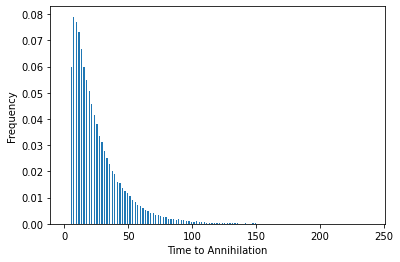

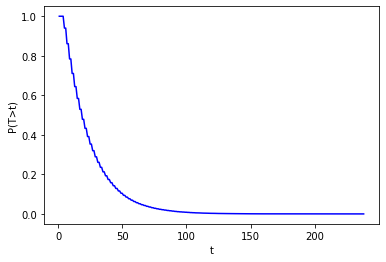

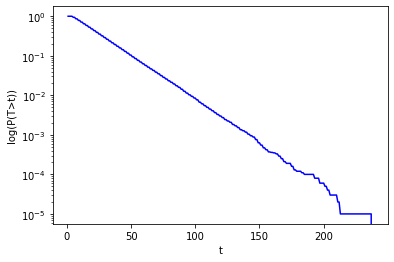

In [8]:
def ccw_ann(N, s, p):
    times = []
    for i in range(s):
        particles = list(range(N))
        count = N
        t = 0
        while count > 1:
            part = random.randint(0,len(particles)-1)
            chance = random.uniform(0, 1)
            if chance <= p:
                particles[part] = (particles[part]+1)%N
            else:
                particles[part] = (particles[part]-1)%N
            if particles.count(particles[part])>1:
                name = particles[part]
                particles.remove(name) #same as before except both particles are removed
                particles.remove(name)
                count -= 2
            t += 1
        times.append(t)
    return times

times=ccw_ann(10, 100000, 0.5)
plt.hist(times, density=True, bins=list(range(1, max(times)+1)))
plt.xlabel("Time to Annihilation")
plt.ylabel("Frequency")
plt.show()
values, base = np.histogram(times, bins=list(range(1, max(times)+1)))
cumulative = np.cumsum(values)
plt.plot(base[:-1], (len(times)-cumulative)/100000, c='blue')
plt.xlabel("t")
plt.ylabel("P(T>t)")
plt.show()
plt.plot(base[:-1], (len(times)-cumulative)/100000, c='blue')
plt.yscale("log")
plt.xlabel("t")
plt.ylabel("log(P(T>t))")
plt.show()

Best fit function 1: f(x) = 0.256285606058984x^2 + -0.15769727272980028x + 0.5548666666657047
Best fit function 2: f(x) = 0.10781969696775096x^2 + 0.04481212121003686x + -0.1337609090933678


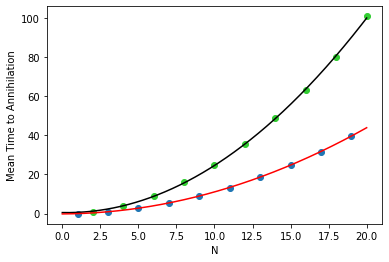

Best fit function 1: f(x) = 1.7916590796509535x^3 + -26.16707032418968x^2 + 141.70009286285776x + -220.4030488360371
Best fit function 2: f(x) = 0.22493709958676678x^3 + -2.8633269481680585x^2 + 12.477920337567904x + -13.468625637078649


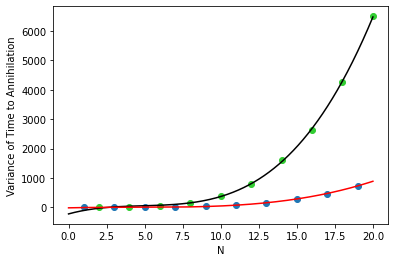

In [9]:
def ccw_ann_func(): #plots mean time to annihilation as a function of N
    n_evens = list(range(2, 21, 2))
    n_odds = list(range(1, 21, 2))
    t_aves_even = []
    t_vars_even = []
    t_aves_odd = []
    t_vars_odd = []
    for n in range(1, 21):
        c = ccw_ann(n, 10000, 0.5)
        ave = mean(c)
        var = variance(c)
        if n%2==0:
            t_aves_even.append(ave)
            t_vars_even.append(var)
        else:
            t_aves_odd.append(ave)
            t_vars_odd.append(var)
    params1, cov1 = curve_fit(func1, n_evens, t_aves_even)
    params2, cov2 = curve_fit(func1, n_odds, t_aves_odd)
    x = np.linspace(0, 20, 1000)
    y1 = params1[0]*(x**2) + params1[1]*x + params1[2]
    y2 = params2[0]*(x**2) + params2[1]*x + params2[2]
    print("Best fit function 1:", "f(x) = "+str(params1[0])+"x^2 + "+str(params1[1])+"x + "+str(params1[2]))
    print("Best fit function 2:", "f(x) = "+str(params2[0])+"x^2 + "+str(params2[1])+"x + "+str(params2[2]))
    plt.scatter(n_evens, t_aves_even, c="limegreen")
    plt.scatter(n_odds, t_aves_odd)
    plt.plot(x, y1, color="black")
    plt.plot(x, y2, color="red")
    plt.xlabel("N")
    plt.ylabel("Mean Time to Annihilation")
    plt.show()
    params1, cov1 = curve_fit(func2, n_evens, t_vars_even)
    params2, cov2 = curve_fit(func2, n_odds, t_vars_odd)
    x = np.linspace(0, 20, 1000)
    y1 = params1[0]*(x**3) + params1[1]*(x**2) + params1[2]*x + params1[3]
    y2 = params2[0]*(x**3) + params2[1]*(x**2) + params2[2]*x + params2[3]
    print("Best fit function 1:", "f(x) = "+str(params1[0])+"x^3 + "+str(params1[1])+"x^2 + "+str(params1[2])+"x + "+str(params1[3]))
    print("Best fit function 2:", "f(x) = "+str(params2[0])+"x^3 + "+str(params2[1])+"x^2 + "+str(params2[2])+"x + "+str(params2[3]))
    plt.scatter(n_evens, t_vars_even, c="limegreen")
    plt.scatter(n_odds, t_vars_odd)
    plt.plot(x, y1, color="black")
    plt.plot(x, y2, color="red")
    plt.xlabel("N")
    plt.ylabel("Variance of Time to Annihilation")
    plt.show()

ccw_ann_func()

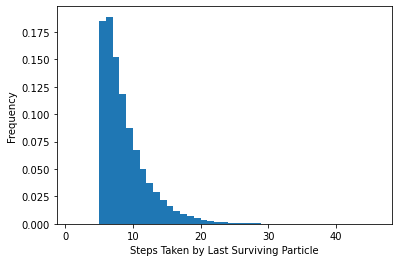

average steps: 8.34537


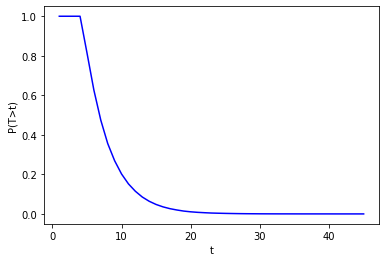

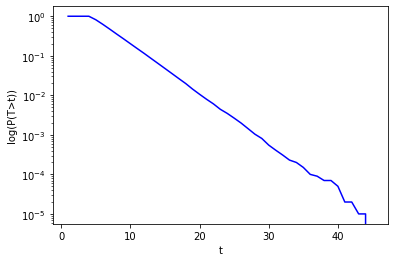

In [10]:
def survivor_steps(N, s): #counts # of steps of last surviving particle in coalescing model w/ N particles over s sims
    steps = []
    for i in range(s): #runs s sims
        particles = []
        for j in range(N): #creates list of lists, each sublist containing a label, a position, and a number of steps taken
            particles.append([j, j, 0])
        count = N
        while count > 1: #runs until a single particle remains
            part = random.randint(0, len(particles)-1) #generates random index in list of particles
            particles[part][1] = (particles[part][1] + 1)%N #moves particle at that index to next position
            particles[part][2] += 1 #adds 1 to number of steps taken by that particle
            k = (part+1)%(len(particles))
            if particles[k][1] == particles[part][1]: #if the position of the particle is the same as the next surviving particle, eliminates the latter
                particles.remove(particles[k])
                count -= 1
        steps.append(particles[0][2]) #adds number of steps taken by last surviving particle to list
    return steps

steps = survivor_steps(6, 100000)
plt.hist(steps, density=True, bins=list(range(1, max(steps)+1)))
plt.xlabel("Steps Taken by Last Surviving Particle")
plt.ylabel("Frequency")
plt.show()
print("average steps:", mean(steps))
values, base = np.histogram(steps, bins=list(range(1, max(steps)+1)))
cumulative = np.cumsum(values)
plt.plot(base[:-1], (len(steps)-cumulative)/100000, c='blue')
plt.xlabel("t")
plt.ylabel("P(T>t)")
plt.show()
plt.plot(base[:-1], (len(steps)-cumulative)/100000, c='blue')
plt.yscale("log")
plt.xlabel("t")
plt.ylabel("log(P(T>t))")
plt.show()

In [4]:
def surv_func(k): #plots mean number of steps of surviving particle as a function of N
    n_vals = list(range(1, k+1))
    t_aves = []
    t_vars = []
    for n in range(1, k+1):
        c = survivor_steps(n, 100000)
        ave = mean(c)
        var = variance(c)
        t_aves.append(ave)
        t_vars.append(var)
    return n_vals, t_aves, t_vars

k = 30
n, t, v = surv_func(k)
params, cov = curve_fit(func1, n, t)
x = np.linspace(0, k, 1000)
y = params[0]*(x**2) + params[1]*x + params[2]
print("Best fit function:", "f(x) = "+str(params[0])+"x^2 + "+str(params[1])+"x + "+str(params[2]))
plt.scatter(n, t)
plt.plot(x, y, color="black")
plt.xlabel("N")
plt.ylabel("Mean Steps Taken by Surviving Particle")
plt.show()
params, cov = curve_fit(func2, n, v)
x = np.linspace(0, k, 1000)
y = params[0]*(x**3) + params[1]*(x**2) + params[2]*x + params[3]
print("Best fit function:", "f(x) = "+str(params[0])+"x^3 + "+str(params[1])+"x^2 + "+str(params[2])+"x + "+str(params[3]))
plt.scatter(n, v)
plt.plot(x, y, c="black")
plt.xlabel("N")
plt.ylabel("Variance of Steps Taken by Surviving Particle")
plt.show()
#best fit function is (1/6)(n^2 + 3n - 4)

NameError: name 'survivor_steps' is not defined

Best fit function 1: f(x) = 0.17413250527264923x^2 + 0.10076795429803787x + 2.655055710642156
Best fit function 2: f(x) = 0.1660799933031959x^2 + 0.5127702718153373x + -0.7738761836770933


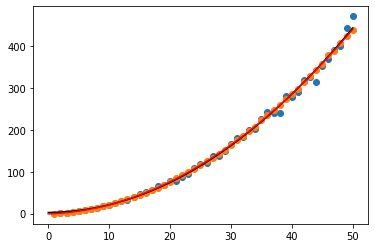

In [12]:
def pair_steps(N, s):
    steps = []
    for i in range(s): 
        particles = [[0,0,0],[1,1,0]]
        count = 2
        while count > 1: 
            part = random.randint(0, 1) 
            particles[part][1] = (particles[part][1] + 1)%N 
            particles[part][2] += 1
            k = (part+1)%2
            if particles[k][1] == particles[part][1]:
                particles.remove(particles[k])
                count -= 1
        if particles[0][0] == 0:
            steps.append(particles[0][2]+1)
            
        else:
            steps.append(-particles[0][2])
    return mean(steps)*N

def pair_func(k):
    n_vals = list(range(2, k+1))
    m_vals = []
    for n in range(2, k+1):
        m_vals.append(pair_steps(n, 50000))
    return n_vals, m_vals

k = 50
n, m = pair_func(k)
s, t, v = surv_func(k)
params1, cov1 = curve_fit(func1, n, m)
params2, cov2 = curve_fit(func1, s, t)
x = np.linspace(0, k, 1000)
y1 = params1[0]*(x**2) + params1[1]*x + params1[2]
y2 = params2[0]*(x**2) + params2[1]*x + params2[2]
print("Best fit function 1:", "f(x) = "+str(params1[0])+"x^2 + "+str(params1[1])+"x + "+str(params1[2]))
print("Best fit function 2:", "f(x) = "+str(params2[0])+"x^2 + "+str(params2[1])+"x + "+str(params2[2]))
plt.scatter(n, m)
plt.scatter(s, t)
plt.plot(x, y1, c="black")
plt.plot(x, y2, c="red")
plt.show()

In [13]:
m[4]

8.25036

In [5]:
def pair_steps2(N, s):
    steps = []
    for i in range(s): 
        particles = [[0,0,0],[1,1,0]]
        count = 2
        while count > 1: 
            part = random.randint(0, 1) 
            particles[part][1] = (particles[part][1] + 1)%N 
            particles[part][2] += 1
            k = (part+1)%2
            if particles[k][1] == particles[part][1]:
                count -= 1
        steps.append(particles[0][2])
    return steps

def pair_func2(k):
    n_vals = list(range(1, k+1))
    m_vals = []
    for n in range(1, k+1):
        m_vals.append(mean(pair_steps2(n, 100000))*n)
    return n_vals, m_vals

k = 30
n, m = pair_func2(k)
params, cov = curve_fit(func1, n, m)
x = np.linspace(0, k, 1000)
y = params[0]*(x**2) + params[1]*x + params[2]
print("Best fit function:", "f(x) = "+str(params[0])+"x^2 + "+str(params[1])+"x + "+str(params[2]))
plt.scatter(n, m)
plt.plot(x, y, c='black')
plt.show()

NameError: name 'mean' is not defined

In [6]:
def corr(N, s):
    steps1 = pair_steps2(N, s)
    steps2 = pair_steps2(N, s)
    step_prod = []
    for i in range(s):
        step_prod.append(steps1[i]*steps2[i])
    return step_prod

def corr_func(k):
    n_vals = list(range(1, k+1))
    m_vals = []
    for n in range(1, k+1):
        m_vals.append(mean(corr(n, 10000)))
    return n_vals, m_vals

k = 100
n, m = corr_func(k)
params, cov = curve_fit(func1, n, m)
x = np.linspace(0, k, 1000)
y1 = params[0]*(x**2) + params[1]*x + params[2]
y2 = ((x-1)/2)**2
print("Best fit function:", "f(x) = "+str(params[0])+"x^2 + "+str(params[1])+"x + "+str(params[2]))
plt.scatter(n, m)
plt.plot(x, y1, c='black')
plt.plot(x, y2, c='red')
plt.show()
ys = [1]
for i in range(1, len(n)):
    ys.append(m[i]/(((n[i]-1)/2)**2))
plt.scatter(n, ys)
plt.show()

NameError: name 'mean' is not defined

In [46]:
def pair_steps3(N, s):
    steps = [[] for x in range(N)]
    for i in range(s): #runs s sims
        particles = []
        for j in range(N): #creates list of lists, each sublist containing a label, a position, and a number of steps taken
            particles.append([j, j, 0])
        count = N
        while count > 1: #runs until a single particle remains
            part = random.randint(0, len(particles)-1) #generates random index in list of particles
            particles[part][1] = (particles[part][1] + 1)%N
            particles[part][2] += 1
            k = (part+1)%(len(particles))
            if particles[k][1] == particles[part][1]:
                """
                if particle moves to occupied node, removes that particle and records the number of steps
                it took before reaching the next particle
                """
                steps[particles[part][0]].append(particles[part][2])
                particles.remove(particles[part])
                count -= 1
        steps[particles[0][0]].append(particles[0][2]) #adds number of steps taken by last surviving particle to list
    return steps

def pair_exp(N, s, i, j):
    steps = pair_steps3(N, s)
    prod_exp = []
    for x in range(s):
        prod_exp.append(steps[i][x]*steps[j][x])
    return mean(prod_exp)

def pair_func3(max_n, s, i, j):
    m_vals = []
    for w in range(j+1, max_n+1):
        m_vals.append(pair_exp(w, s, i, j))
    return list(range(j+1, max_n+1)), m_vals

j_list = [1, 5, 10, 15, 20, 25, 29]
for w in j_list:
    diff = pair_exp(30, 100000, 0, w) - (29/2)**2
    print("E[T0T"+str(w)+"] - E[T0]E[T"+str(w)+"] =", diff)

E[T0T1] - E[T0]E[T1] = -133.77451000000002
E[T0T5] - E[T0]E[T5] = -34.43531999999999
E[T0T10] - E[T0]E[T10] = 22.710430000000002
E[T0T15] - E[T0]E[T15] = 36.76580000000001
E[T0T20] - E[T0]E[T20] = 16.805949999999996
E[T0T25] - E[T0]E[T25] = -34.74135000000001
E[T0T29] - E[T0]E[T29] = -126.5839


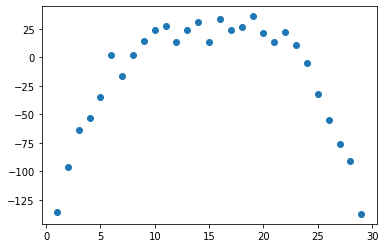

In [47]:
j_list_2 = list(range(1, 30))
cov_list = []
for w in j_list_2:
    diff = pair_exp(30, 100000, 0, w) - (29/2)**2
    cov_list.append(diff)

plt.scatter(j_list_2, cov_list)
plt.show()

Best fit function: f(x) = -0.0030050589141350503x^4 + 0.17515623694594284x^3 + -4.0698980546741526x^2 + 45.20911920390241x + -173.5265756754825


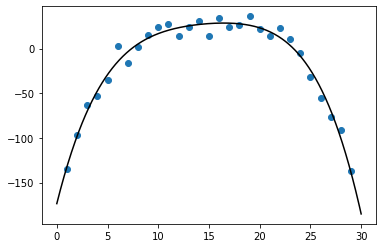

In [53]:
params, cov = curve_fit(func3, j_list_2, cov_list)
x = np.linspace(0, 30, 1000)
y = params[0]*(x**4) + params[1]*(x**3) + params[2]*(x**2) + params[3]*x + params[4]
print("Best fit function:", "f(x) = "+str(params[0])+"x^4 + "+str(params[1])+"x^3 + "+str(params[2])+"x^2 + "+str(params[3])+"x + "+str(params[4]))
plt.scatter(j_list_2, cov_list)
plt.plot(x, y, c='black')
plt.show()

In [89]:
def lyons_line(N, s):
    steps = [[] for x in range(N-1)]
    for i in range(s):
        particles = []
        for j in range(N-1):
            particles.append([j, j, 0])
        count = N-1
        while count > 0:
            part = random.randint(0, len(particles)-1)
            particles[part][1] = (particles[part][1] - 1)
            particles[part][2] += 1
            if particles[part][1] == -1:
                steps[particles[part][0]].append(particles[part][2])
                particles.remove(particles[part])
                count -= 1
            else:
                if part > 0:
                    k = (part-1)
                    if particles[k][1] == particles[part][1]:
                        """
                        if particle moves to occupied node, removes that particle and records the number of steps
                        it took before reaching the next particle
                        """
                        steps[particles[part][0]].append(particles[part][2])
                        particles.remove(particles[part])
                        count -= 1
    return steps

def lyons_exp(i, j, lyst):
    prod_exp = []
    for x in range(len(lyst[0])):
        prod_exp.append(lyst[i][x]*lyst[j][x])
    return mean(prod_exp)

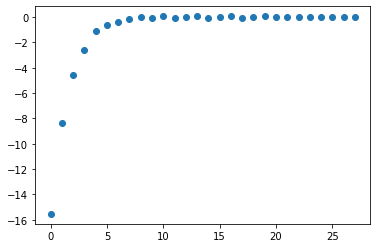

In [90]:
lyst = lyons_line(30, 1000000)
j_list_3 = list(range(28))
cov_list_2 = []
for w in j_list_3[::-1]:
    diff = lyons_exp(28, w, lyst) - mean(lyst[w])*mean(lyst[28])
    cov_list_2.append(diff)

plt.scatter(j_list_3, cov_list_2)
plt.show()

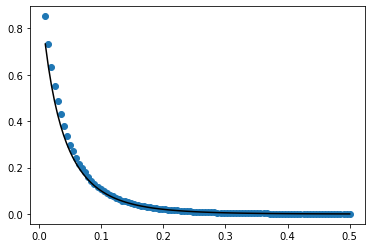

In [112]:
def pair_time(N, s):
    times = []
    for i in range(s): 
        particles = [[0,0,0],[1,1,0]]
        count = 2
        t = 0
        while count > 1:
            t += 1
            part = random.randint(0, 1) 
            particles[part][1] = (particles[part][1] + 1)%N
            particles[part][2] += 1
            k = 1 - part
            if particles[k][1] == particles[part][1]:
                if particles[part][0] == 1:
                    count -= 1
                    times.append(t)
                else:
                    particles = [[0,0,0],[1,1,0]]
                    t = 0
    return times

def f_lambda(lam, N, s):
    times = pair_time(N, s)
    val_list = []
    for t in times:
        val_list.append(np.e**(-lam*t))
    return mean(val_list)

def lambda_func(k, N, s):
    f_lam_lst = []
    for l in range(1, k+1):
        f_lam_lst.append(f_lambda(l/(2*k), N, s))
    return f_lam_lst

N = 10
s = 10000
k = 100
x = np.linspace(1/k, 0.5, k)
y1 = lambda_func(k, N, s)
z = (1 - np.sqrt(1 - np.e**(-2*x)))/(1 + np.sqrt(1 - np.e**(-2*x)))
y2 = N*(np.sinh((1/2)*np.log((1 - np.sqrt(1 - np.e**(-2*x)))/(1 + np.sqrt(1 - np.e**(-2*x)))))/np.sinh((N/2)*np.log((1 - np.sqrt(1 - np.e**(-2*x)))/(1 + np.sqrt(1 - np.e**(-2*x))))))
plt.scatter(x, y1)
plt.plot(x, y2, c='black')
plt.show()


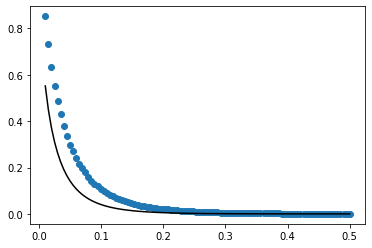

In [113]:
y3 = N*(np.sqrt(z**N)*(1-z))/(np.sqrt(1/z)*(1-z**(N)))
plt.scatter(x, y1)
plt.plot(x, y3, c='black')
plt.show()

In [109]:
def taus(N, s):
    steps = [[] for x in range(N)]
    times = []
    for i in range(s): #runs s sims
        steps2 = [0]*N
        particles = []
        for j in range(N): #creates list of lists, each sublist containing a label, a position, and a number of steps taken
            particles.append([j, j, 0])
        count = N
        t = 0
        while count > 1: #runs until a single particle remains
            t += 1
            part = random.randint(0, len(particles)-1) #generates random index in list of particles
            particles[part][1] = (particles[part][1] + 1)%N #moves particle to next node
            particles[part][2] += 1 #adds 1 to steps taken by particle
            k = (part+1)%(len(particles))
            if particles[k][1] == particles[part][1]: #if particle moves into occupied node
                if particles[part][0] == 0: #if the absorber is 0, resets the whole system
                    steps2 = [0]*N
                    particles = []
                    for j in range(N):
                        particles.append([j, j, 0])
                    count = N
                    t = 0
                else: 
                    count -= 1
                    if particles[k][0] == 0: #if the absorbee is 0, removes absorber and counts its steps
                        steps2[particles[part][0]] = particles[part][2]
                        particles.remove(particles[part])
                    else: #if absorbee is not 0, removes absorbee and counts its steps
                        steps2[particles[k][0]] = particles[k][2]
                        particles.remove(particles[k])
        steps2[0] += particles[0][2]
        for w in range(N):
            steps[w].append(steps2[w])
        times.append(t)
    return steps, times

def tau_exp(N, s):
    E_taus = []
    steps, times = taus(N, s)
    E_time = mean(times)
    for lst in steps:
        E_taus.append(mean(lst))
    return E_taus, E_time

N=50
s=100000
E_tau_lst, E_time = tau_exp(N, s)
total = 0
for i in range(N):
    total += E_tau_lst[i]
    print(E_tau_lst[i])
print(total)
print(E_time)

390.83899
439.83899
2.5147
4.38268
5.84199
7.03731
8.03234
9.14222
9.6456
10.33918
10.66698
11.14873
11.76663
11.76356
12.12972
12.29213
12.59236
12.48867
12.1536
12.15224
11.92502
12.0242
11.90654
11.69101
11.43253
11.1247
10.81011
10.37285
10.13114
9.89179
9.74285
9.02309
8.78048
8.25642
7.84536
7.37362
6.92684
6.4128
6.07725
5.51041
5.0819
4.57869
4.03301
3.56759
3.11
2.58336
2.09252
1.5954
1.09997
0.57712
1222.34719
1222.34719


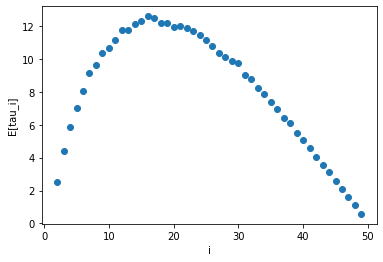

In [110]:
plt.scatter(list(range(2, N)), E_tau_lst[2:])
plt.xlabel("i")
plt.ylabel("E[tau_i]")
plt.show()